In [ ]:
# install poetry if not already installed
!pip install poetry

# install dependencies
!poetry install

# set active kernel to poetry virtual environment MANUALLY

In [2]:
# setup selenium
from selenium.webdriver.chrome.options import Options
from selenium import webdriver

url = "https://postboard.martinmiglio.dev/"

# define all the options as a list
options = [
    "--window-size=1920x1080",
    "--disable-gpu",
    "--headless",
    "--disable-dev-shm-usage",
    "--disable-extensions",
]

# create the chrome options
chrome_options = Options()
for option in options:
    chrome_options.add_argument(option)


In [3]:
# define page load for testing
import time

scroll_count = 5


def load_page(driver: webdriver.Chrome, url: str):
    start_time = time.time()
    driver.get(url)
    duration = time.time() - start_time
    time.sleep(1)
    for _ in range(scroll_count):
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(1)
    driver.quit()
    return duration


average load time: 8.386311433315278 seconds


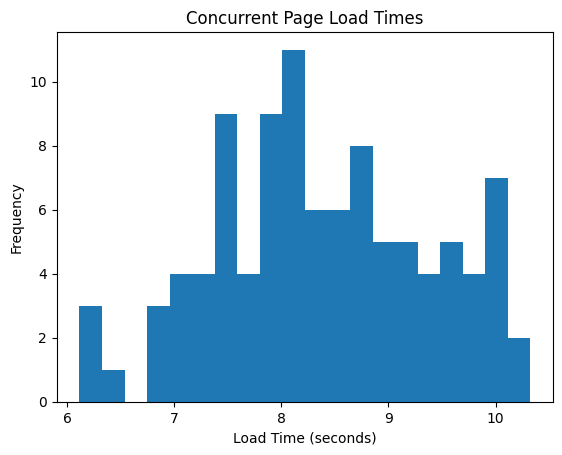

In [4]:
# use selenium to load many pages of the website concurrently
from concurrent.futures import ThreadPoolExecutor
import matplotlib.pyplot as plt

count = 100


durations: list[float] = []

# use pools to load the pages, and get the durations
with ThreadPoolExecutor(max_workers=count) as executor:
    durations = list(
        executor.map(
            load_page,
            [webdriver.Chrome(options=chrome_options) for _ in range(count)],
            [url for _ in range(count)],
        )
    )

print(f"average load time: {sum(durations) / len(durations)} seconds")

# plot a histogram of the durations

plt.hist(durations, bins=20)
plt.title("Concurrent Page Load Times")
plt.xlabel("Load Time (seconds)")
plt.ylabel("Frequency")
plt.show()


average load time: 0.5687160181999207 seconds


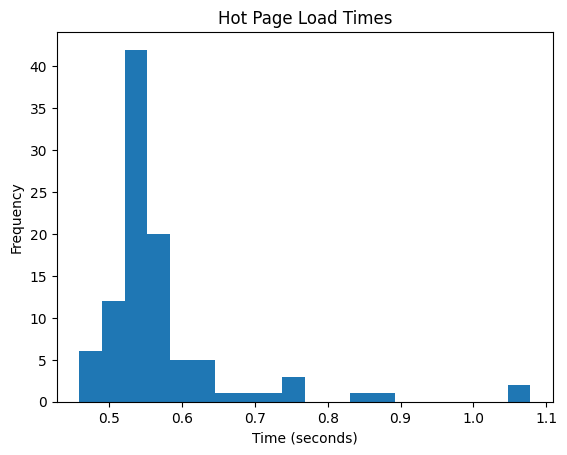

In [16]:
# use selenium to load the page many times sequentially, in a quick succession
import matplotlib.pyplot as plt

count = 100


durations: list[float] = []

for _ in range(count):
    driver = webdriver.Chrome(options=chrome_options)
    durations.append(load_page(driver, url))

print(f"average load time: {sum(durations) / len(durations)} seconds")

# plot a histogram of the durations

plt.hist(durations, bins=20)
plt.title("Hot Page Load Times")
plt.xlabel("Load Time (seconds)")
plt.ylabel("Frequency")
plt.show()

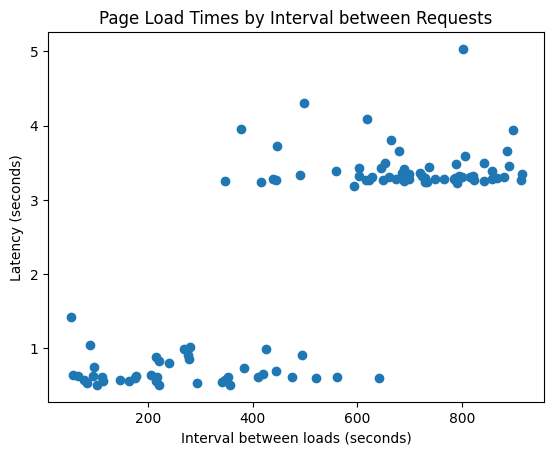

In [17]:
# a test for variable page load times, depending on the random time between requests
# this is intended to test hot vs cold page loads
import random
import matplotlib.pyplot as plt

count = 100
max_delay = 15 * 60  # seconds


load_time_by_delay: dict[float, float] = {}

for _ in range(count):
    actual_start_time = time.time()
    driver = webdriver.Chrome(options=chrome_options)
    delay = random.randint(0, max_delay)  # in seconds
    time.sleep(delay)
    duration = load_page(driver, url)
    actual_delay = time.time() - actual_start_time
    load_time_by_delay[actual_delay] = duration

# plot the load times by delay
plt.scatter(list(load_time_by_delay.keys()), list(load_time_by_delay.values()))
plt.title("Page Load Times by Interval between Requests")
plt.xlabel("Interval between loads (seconds)")
plt.ylabel("Latency (seconds)")
plt.show()
